In [56]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import pandas as pd

In [58]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [59]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [60]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [61]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [62]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [63]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [64]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastDate = session.query(measurement.date).order_by(measurement.date.desc()).first()
lastDate


('2017-08-23')

In [66]:
# Calculate the date 1 year ago from the last data point in the database
lastDateFormat = dt.datetime.strptime(lastDate[0], "%Y-%m-%d")
lastYearDate = lastDateFormat - dt.timedelta(days=365)
lastYearDateFormat = lastYearDate.strftime("%Y-%m-%d")
lastYearDateFormat


'2016-08-23'

In [67]:
# Perform a query to retrieve the data and precipitation scores
rainData = session.query(measurement.date, measurement.prcp).filter(measurement.date > lastYearDateFormat).all()


In [68]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rainDataFrame = pd.DataFrame(rainData, columns=['Date', 'PRCP'])
rainDataFrame.set_index('Date', inplace=True)
rainDataFrame.head()


,PRCP
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [69]:
# Sort the dataframe by date
rainDataFrame= rainDataFrame.sort_index()
rainDataFrame.head()


,PRCP
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


C:\Users\Abhijit\Documents\Programs\Projects\RUT-JER-DATA-PT-07-2020-U-C\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-24'),
  Text(500.0, 0, '2016-11-10'),
  Text(1000.0, 0, '2017-01-29'),
  Text(1500.0, 0, '2017-04-19'),
  Text(2000.0, 0, '2017-07-11'),
  Text(2500.0, 0, '')])

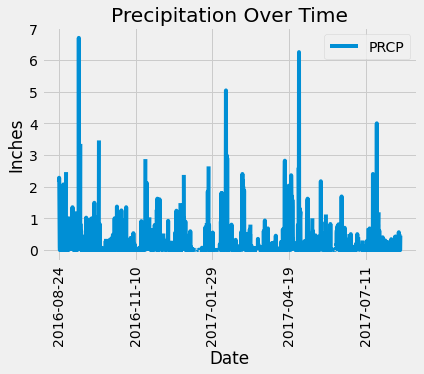

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data
rainDataFrame.plot()
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)


In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
rainDataFrame.describe()

,PRCP
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [72]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(measurement.station).distinct().count()
print(f"There are {stations} distinct stations.")


There are 9 distinct stations.


In [73]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationsActive = session.query(measurement.station, func.count(measurement.station))
stationsActive = stationsActive.group_by(measurement.station)
stationsActive = stationsActive.order_by(func.count(measurement.station).desc()).all()
stationsActive


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowestTemp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
highestTemp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
averageTemp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

activeStationInfo = pd.DataFrame({'Lowest Temp' : lowestTemp[0],
                                  'Highest Temp' : highestTemp[0],
                                  'Average Temp' : averageTemp[0]},
                                   index=['USC00519281'])
activeStationInfo


,Lowest Temp,Highest Temp,Average Temp
USC00519281,54.0,85.0,71.663781


In [75]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highTempData = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281')
highTempData = highTempData.filter(measurement.date > lastYearDateFormat).all()
tempDataFrame = pd.DataFrame(highTempData)
tempDataFrame.head()


,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


Text(0.5, 1.0, 'Histogram of Temperatures at USC00519281')

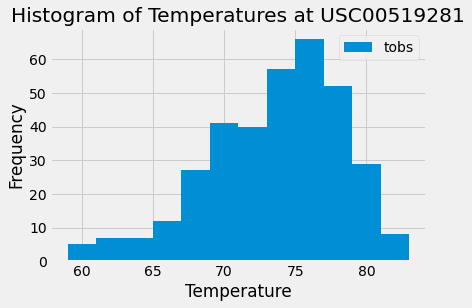

In [76]:
tempDataFrame.plot(kind="hist", bins=12)
plt.xlabel('Temperature')
plt.title('Histogram of Temperatures at USC00519281')
